# 导入工具包

In [2]:
import networkx as nx
import numpy as np
import random
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
import PIL

# 自定义图标

In [4]:
icons = {
    'router': 'data/8726556_wifi_router_icon.png',
    'switch': 'data/3259413_media_social_wifi_icon.png',
    'PC': 'data/1936905_computer_device_mac_pc_work_icon.png'
}
images = {k: PIL.Image.open(fname) for k, fname in icons.items()}

In [5]:
images

{'router': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x512>,
 'switch': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x512>,
 'PC': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x512>}

# 创建图

In [7]:
# Generate the computer network graph
G = nx.Graph()

G.add_node("router", image=images["router"])
for i in range(1, 4):
    G.add_node(f"switch_{i}", image=images["switch"])
    for j in range(1, 4):
        G.add_node("PC_" + str(i) + "_" + str(j), image=images["PC"])

G.add_edge("router", "switch_1")
G.add_edge("router", "switch_2")
G.add_edge("router", "switch_3")
for u in range(1, 4):
    for v in range(1, 4):
        G.add_edge("switch_" + str(u), "PC_" + str(u) + "_" + str(v))

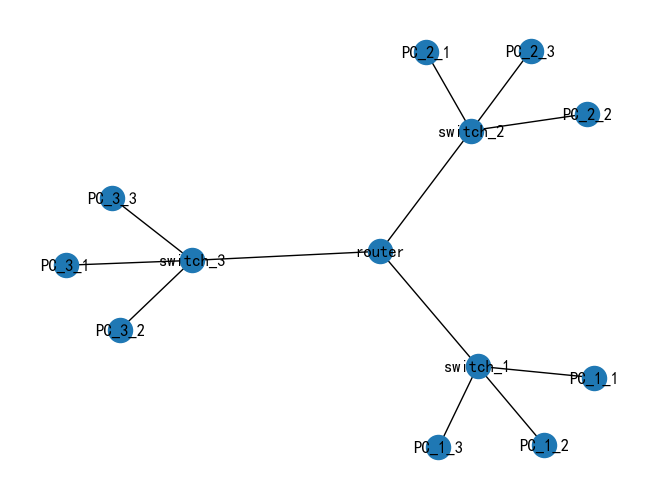

In [8]:
nx.draw(G, with_labels=True)

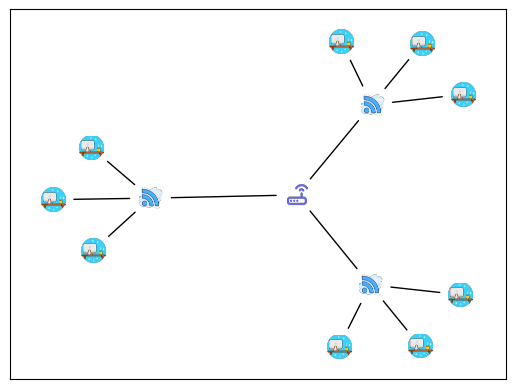

In [9]:
# Get a reproducible layout and create figure
pos = nx.spring_layout(G, seed=1734289230)
fig, ax = plt.subplots()

# Note: the min_source/target_margin kwargs only work with FancyArrowPatch objects.
# Force the use of FancyArrowPatch for edge drawing by setting `arrows=True`,
# but suppress arrowheads with `arrowstyle="-"`
nx.draw_networkx_edges(
    G,
    pos=pos,
    ax=ax,
    arrows=True,
    arrowstyle="-",
    min_source_margin=15,
    min_target_margin=15,
)

# Transform from data coordinates (scaled between xlim and ylim) to display coordinates
tr_figure = ax.transData.transform
# Transform from display to figure coordinates
tr_axes = fig.transFigure.inverted().transform

# Select the size of the image (relative to the X axis)
icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.025
icon_center = icon_size / 2.0

# Add the respective image to each node
for n in G.nodes:
    xf, yf = tr_figure(pos[n])
    xa, ya = tr_axes((xf, yf))
    # get overlapped axes and plot icon
    a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
    a.imshow(G.nodes[n]["image"])
    a.axis("off")
plt.show()